In [3]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\92204038.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#load data from cvs file
income_dataset = pd.read_csv('income_dataset.csv')
print(income_dataset)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

## DATA ANALYSIS

## 1. FINDING THE COLUMNS AND THEIR TYPES

In [5]:
# Setting all the categorical columns to type category
for col in set(income_dataset.columns) - set(income_dataset.describe().columns):
    income_dataset[col] = income_dataset[col].astype('category')
    
print('Columns and their types')
print(income_dataset.info())

Columns and their types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            31978 non-null  int64   
 1   JobType        31978 non-null  category
 2   EdType         31978 non-null  category
 3   maritalstatus  31978 non-null  category
 4   occupation     31978 non-null  category
 5   relationship   31978 non-null  category
 6   race           31978 non-null  category
 7   gender         31978 non-null  category
 8   capitalgain    31978 non-null  int64   
 9   capitalloss    31978 non-null  int64   
 10  hoursperweek   31978 non-null  int64   
 11  nativecountry  31978 non-null  category
 12  SalStat        31978 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.3 MB
None


In [59]:
#first five records
income_dataset.head()

age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry SalStat  
0   United-States    <50k  
1   United-States    <50k  
2   United-States    >50k  
3          Mexico    <50k  
4   United-States    <50k

In [58]:
#last five records
income_dataset.tail()

age     JobType         EdType        maritalstatus        occupation  \
31973   34   Local-gov        HS-grad        Never-married   Farming-fishing   
31974   34   Local-gov   Some-college        Never-married   Protective-serv   
31975   23     Private   Some-college   Married-civ-spouse      Adm-clerical   
31976   42   Local-gov   Some-college   Married-civ-spouse      Adm-clerical   
31977   29     Private      Bachelors        Never-married    Prof-specialty   

         relationship    race   gender  capitalgain  capitalloss  \
31973   Not-in-family   Black     Male          594            0   
31974   Not-in-family   White   Female            0            0   
31975         Husband   White     Male            0            0   
31976            Wife   White   Female            0            0   
31977   Not-in-family   White     Male            0            0   

       hoursperweek   nativecountry SalStat  
31973            60   United-States    <50k  
31974            40   United-States    <50k  
31975            40   United-States    <50k  
31976            40   United-States    <50k  
31977            40   United-States    <50k

In [8]:
income_dataset.describe()

age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000

In [9]:
income_dataset.sample()

age   JobType       EdType maritalstatus        occupation  \
22633   39   Private   Assoc-acdm      Divorced   Exec-managerial   

      relationship    race gender  capitalgain  capitalloss  hoursperweek  \
22633    Unmarried   White   Male         1506            0            40   

        nativecountry                        SalStat  
22633   United-States   less than or equal to 50,000

In [10]:
income_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            31978 non-null  int64   
 1   JobType        31978 non-null  category
 2   EdType         31978 non-null  category
 3   maritalstatus  31978 non-null  category
 4   occupation     31978 non-null  category
 5   relationship   31978 non-null  category
 6   race           31978 non-null  category
 7   gender         31978 non-null  category
 8   capitalgain    31978 non-null  int64   
 9   capitalloss    31978 non-null  int64   
 10  hoursperweek   31978 non-null  int64   
 11  nativecountry  31978 non-null  category
 12  SalStat        31978 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.3 MB


In [11]:
income_dataset.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

## Replacing the ? in the dataset with NAN

In [12]:
#replacing the ? in the dataset with NAN
income_dataset=income_dataset.replace({' ?':np.nan})
income_dataset.head(10)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\453850278.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  income_dataset=income_dataset.replace({' ?':np.nan})
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\453850278.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  income_dataset=income_dataset.replace({' ?':np.nan})


age       JobType         EdType        maritalstatus          occupation  \
0   45       Private        HS-grad             Divorced        Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married        Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse      Prof-specialty   
3   27       Private            9th        Never-married        Craft-repair   
4   20       Private   Some-college        Never-married               Sales   
5   44       Private        HS-grad              Widowed     Exec-managerial   
6   51       Private        HS-grad   Married-civ-spouse        Craft-repair   
7   20       Private        HS-grad   Married-civ-spouse   Machine-op-inspct   
8   17           NaN           11th        Never-married                 NaN   
9   19       Private        HS-grad        Never-married   Machine-op-inspct   

      relationship                 race   gender  capitalgain  capitalloss  \
0    Not-in-family                White   Female            0            0   
1        Own-child                White     Male            0            0   
2          Husband                White     Male            0            0   
3   Other-relative                White     Male            0            0   
4    Not-in-family                White     Male            0            0   
5        Unmarried                Black   Female            0            0   
6          Husband   Amer-Indian-Eskimo     Male            0            0   
7          Husband                White     Male            0            0   
8        Own-child                White   Female            0            0   
9        Own-child                Black   Female            0            0   

   hoursperweek   nativecountry                        SalStat  
0            28   United-States   less than or equal to 50,000  
1            40   United-States   less than or equal to 50,000  
2            40   United-States            greater than 50,000  
3            40          Mexico   less than or equal to 50,000  
4            35   United-States   less than or equal to 50,000  
5            40   United-States   less than or equal to 50,000  
6            40   United-States   less than or equal to 50,000  
7            40   United-States   less than or equal to 50,000  
8             5   United-States   less than or equal to 50,000  
9            40   United-States   less than or equal to 50,000

## Converting the SalStat into manageable figures

In [13]:
#converting the SalStat into manageable figures
income_dataset['SalStat']=income_dataset['SalStat'].replace({' less than or equal to 50,000':'<50k',' greater than 50,000':'>50k'})
income_dataset

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3756933022.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  income_dataset['SalStat']=income_dataset['SalStat'].replace({' less than or equal to 50,000':'<50k',' greater than 50,000':'>50k'})


age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        Prof-specialty          Husband   White     Male            0   
3          Craft-repair   Other-relative   White     Male            0   
4                 Sales    Not-in-family   White     Male            0   
...                 ...              ...     ...      ...          ...   
31973   Farming-fishing    Not-in-family   Black     Male          594   
31974   Protective-serv    Not-in-family   White   Female            0   
31975      Adm-clerical          Husband   White     Male            0   
31976      Adm-clerical             Wife   White   Female            0   
31977    Prof-specialty    Not-in-family   White     Male            0   

       capitalloss  hoursperweek   nativecountry SalStat  
0                0            28   United-States    <50k  
1                0            40   United-States    <50k  
2                0            40   United-States    >50k  
3                0            40          Mexico    <50k  
4                0            35   United-States    <50k  
...            ...           ...             ...     ...  
31973            0            60   United-States    <50k  
31974            0            40   United-States    <50k  
31975            0            40   United-States    <50k  
31976            0            40   United-States    <50k  
31977            0            40   United-States    <50k  

[31978 rows x 13 columns]

In [14]:
income_dataset.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [15]:
df = pd.DataFrame(income_dataset)

## Filling the Missing values

In [16]:

df['age'].fillna(method='ffill', inplace=True)

#income_dataset.age.fillna(method ='ffill', inplace = True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3523949865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3523949865.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['age'].fillna(method='ffill', inplace=True)


In [17]:
df['JobType'] = df['JobType'].astype(str)
df['JobType'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2155364774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobType'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2155364774.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['JobType'].fillna(method='ffill', inplace=True)


In [18]:
df['EdType'] = df['EdType'].astype(str)
df['EdType'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3813302322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdType'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3813302322.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['EdType'].fillna(method='ffill', inplace=True)


In [19]:
df['maritalstatus'] = df['maritalstatus'].astype(str)
df['maritalstatus'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\1270194849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['maritalstatus'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\1270194849.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['maritalstatus'].fillna(method='ffill', inplace=True)


In [20]:
df['occupation'] = df['occupation'].astype(str)
df['occupation'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3397103409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3397103409.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['occupation'].fillna(method='ffill', inplace=True)


In [21]:
df['relationship'] = df['relationship'].astype(str)
df['relationship'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3438150785.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['relationship'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3438150785.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['relationship'].fillna(method='ffill', inplace=True)


In [22]:
df['race'] = df['race'].astype(str)
df['race'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\1991193406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\1991193406.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['race'].fillna(method='ffill', inplace=True)


In [23]:
df['gender'] = df['gender'].astype(str)
df['gender'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\1146738028.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\1146738028.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['gender'].fillna(method='ffill', inplace=True)


In [24]:
income_dataset.capitalgain.fillna(method ='ffill', inplace = True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3612546445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_dataset.capitalgain.fillna(method ='ffill', inplace = True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\3612546445.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  income_dataset.capitalgain.fillna(method ='ffill', inplace = True)


In [25]:
income_dataset.capitalloss.fillna(method ='ffill', inplace = True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\815903448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_dataset.capitalloss.fillna(method ='ffill', inplace = True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\815903448.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  income_dataset.capitalloss.fillna(method ='ffill', inplace = True)


In [26]:
income_dataset.hoursperweek.fillna(method ='ffill', inplace = True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2820962846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_dataset.hoursperweek.fillna(method ='ffill', inplace = True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2820962846.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  income_dataset.hoursperweek.fillna(method ='ffill', inplace = True)


In [27]:
df['nativecountry'] = df['nativecountry'].astype(str)
df['nativecountry'].fillna(method='ffill', inplace=True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2828543747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nativecountry'].fillna(method='ffill', inplace=True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2828543747.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['nativecountry'].fillna(method='ffill', inplace=True)


In [28]:
income_dataset.SalStat.fillna(method ='ffill', inplace = True)

C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2543214869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_dataset.SalStat.fillna(method ='ffill', inplace = True)
C:\Users\Rita\AppData\Local\Temp\ipykernel_11268\2543214869.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  income_dataset.SalStat.fillna(method ='ffill', inplace = True)


In [60]:
#msno.matrix(income_dataset)

## Finding the number of counts for the varous columns

In [61]:
income_dataset["age"].value_counts()

age
36    875
23    871
31    870
34    862
33    862
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [62]:
income_dataset["JobType"].value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [63]:
income_dataset["EdType"].value_counts()

EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64

In [64]:
income_dataset["maritalstatus"].value_counts()

maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: count, dtype: int64

In [65]:
income_dataset["occupation"].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [66]:
income_dataset["relationship"].value_counts()

relationship
Husband           12947
Not-in-family      8156
Own-child          5005
Unmarried          3384
Wife               1534
Other-relative      952
Name: count, dtype: int64

In [67]:
income_dataset["race"].value_counts()

race
White                 27430
Black                  3028
Asian-Pac-Islander      956
Amer-Indian-Eskimo      311
Other                   253
Name: count, dtype: int64

In [68]:
income_dataset["gender"].value_counts()

gender
Male      21370
Female    10608
Name: count, dtype: int64

In [69]:
income_dataset["capitalgain"].value_counts()

capitalgain
0        29320
15024      341
7688       275
7298       242
99999      152
         ...  
1639         1
22040        1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64

In [70]:
income_dataset["capitalloss"].value_counts()

capitalloss
0       30495
1902      197
1977      163
1887      157
1848       51
        ...  
1539        1
1844        1
2080        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [71]:
income_dataset["hoursperweek"].value_counts()

hoursperweek
40    14932
50     2772
45     1784
60     1439
35     1277
      ...  
82        1
94        1
92        1
74        1
87        1
Name: count, Length: 94, dtype: int64

In [72]:
income_dataset["nativecountry"].value_counts()

nativecountry
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France        

In [73]:
income_dataset["SalStat"].value_counts()

SalStat
<50k    24283
>50k     7695
Name: count, dtype: int64

In [74]:
income_dataset.JobType.ffill( )

0             Private
1         Federal-gov
2             Private
3             Private
4             Private
             ...     
31973       Local-gov
31974       Local-gov
31975         Private
31976       Local-gov
31977         Private
Name: JobType, Length: 31978, dtype: category
Categories (8, object): [' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

## EXPLORATORY ANANLYSIS

In [75]:
#correlation_matrix = df.corr()
#print(correlation_matrix)

## JobType vs SalStat

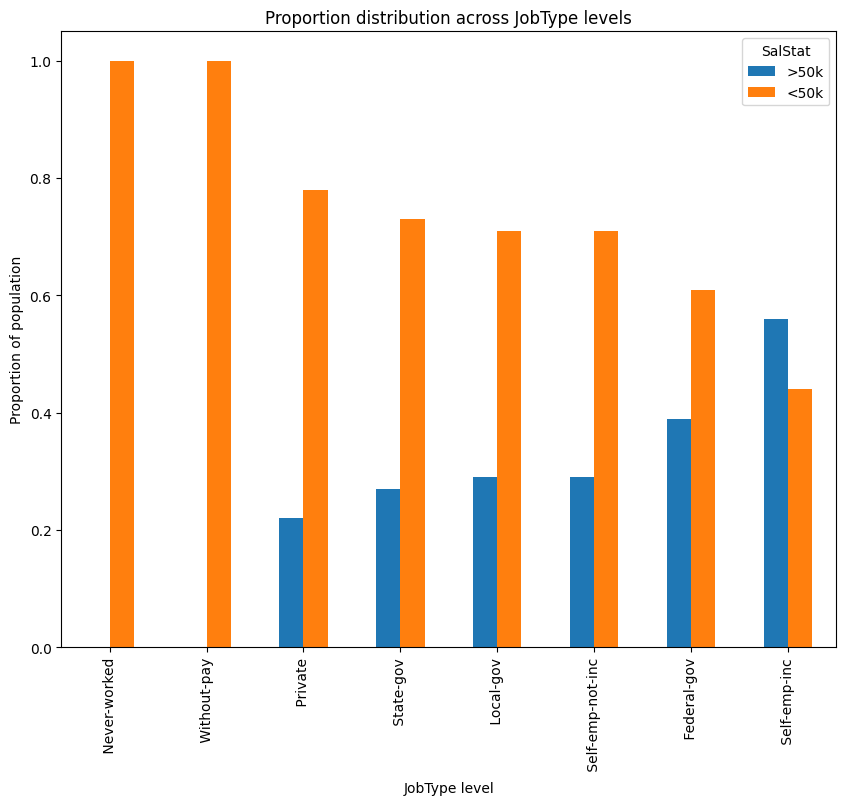

In [76]:
JobType = round(pd.crosstab(income_dataset.JobType, income_dataset.SalStat).div(pd.crosstab(income_dataset.JobType, income_dataset.SalStat).apply(sum,1),0),2)
JobType.sort_values(by = '>50k', inplace = True)
ax = JobType.plot(kind ='bar', title = 'Proportion distribution across JobType levels', figsize = (10,8))
ax.set_xlabel('JobType level')
ax.set_ylabel('Proportion of population')

print()

## EdType Vs SalStat

Text(0, 0.5, 'Proportion of population')

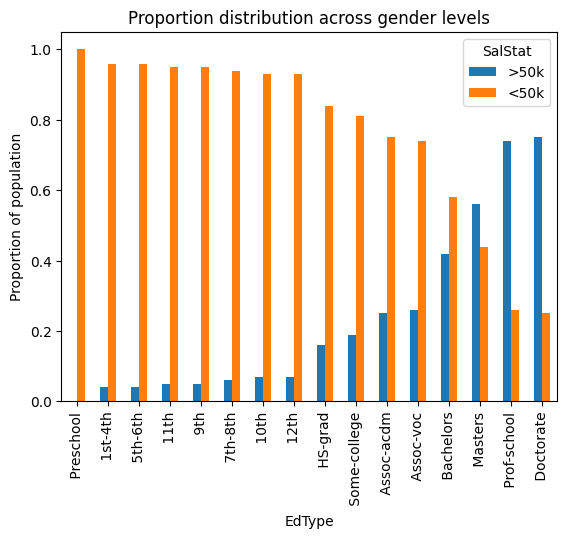

In [77]:
EdType = round(pd.crosstab(income_dataset.EdType, income_dataset.SalStat).div(pd.crosstab(income_dataset.EdType, income_dataset.SalStat).apply(sum,1),0),2,)
EdType.sort_values(by = '>50k', inplace = True)
ax = EdType.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('EdType')
ax.set_ylabel('Proportion of population')

In [78]:
#gender_JobType = round(pd.crosstab(income_dataset.JobType, [income_dataset.SalStat, income_dataset.gender]).div(pd.crosstab(income_dataset.JobType, [income_dataset.SalStat, income_dataset.gender]).apply(sum,1),0),2)
#gender_JobType[[('>50k','Male'), ('>50k','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each JobType', figsize = (10,8), rot = 30)
#ax.set_xlabel('Gender level')
#ax.set_ylabel('Proportion of population')

#printmd('Taking a closer look at the disparity in income between men and women, plot the \
        #proportion of men and women who earn more than 50k a year, across all the working \
        #classes as seen in Fig. 3. We see that men always have a higher proportion earning \
        #more than 50k a year than women, except for the \'without.pay\' working class, where \
        #they have the same proportion.')

## Gender Vs SalStat

Hours per week vs SalStat
we plot a bar graph showing the proportion of SalStat classes across the hours worked.


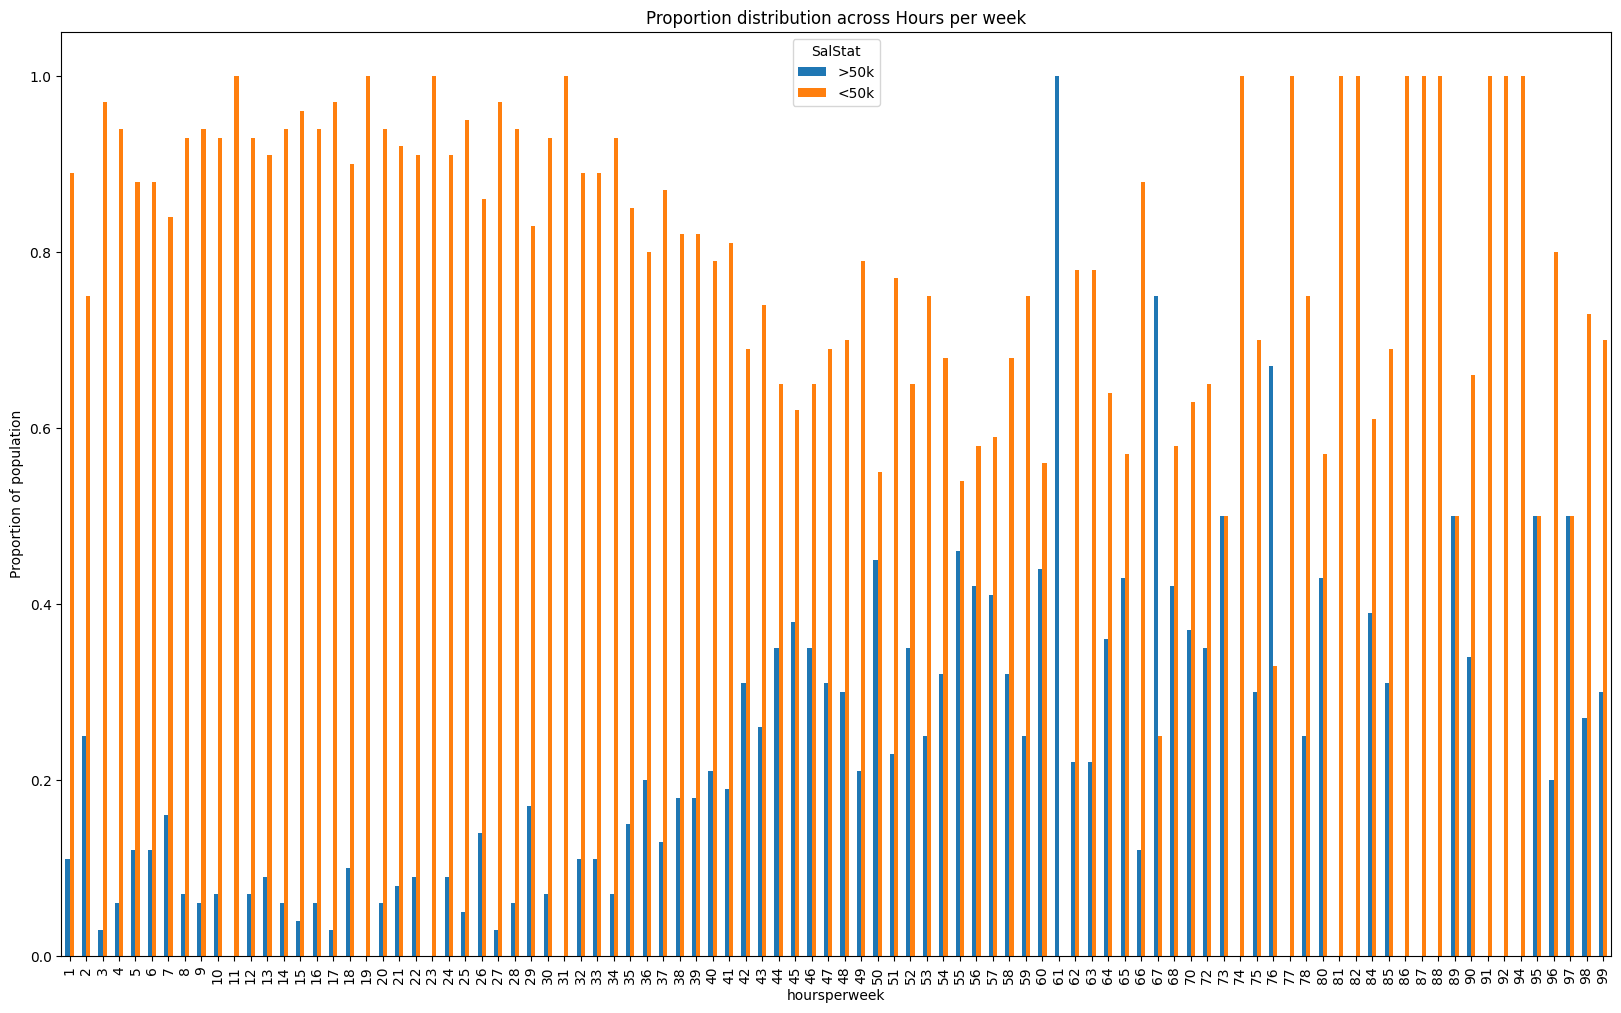

In [79]:
print('Hours per week vs SalStat')

hoursperweek = round(pd.crosstab(income_dataset['hoursperweek'], income_dataset.SalStat).div(pd.crosstab(income_dataset['hoursperweek'], income_dataset.SalStat).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hoursperweek.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('hoursperweek')
ax.set_ylabel('Proportion of population')

print('we plot a bar graph showing the proportion of SalStat classes across the hours worked.')

## Gender Vs SalStat

We plot a bar graph showing the proportion of SalStat classes across the genders in figure below.


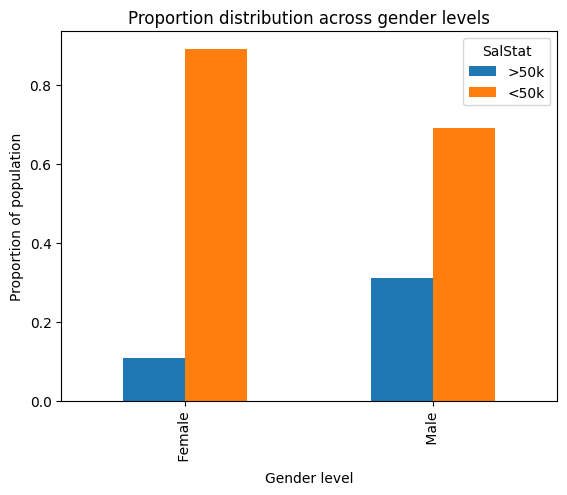

In [80]:
gender = round(pd.crosstab(income_dataset.gender, income_dataset.SalStat).div(pd.crosstab(income_dataset.gender, income_dataset.SalStat).apply(sum,1),0),2,)
gender.sort_values(by = '>50k', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

print('We plot a bar graph showing the proportion of SalStat classes across the genders in figure below.')

## Race vs SalStat


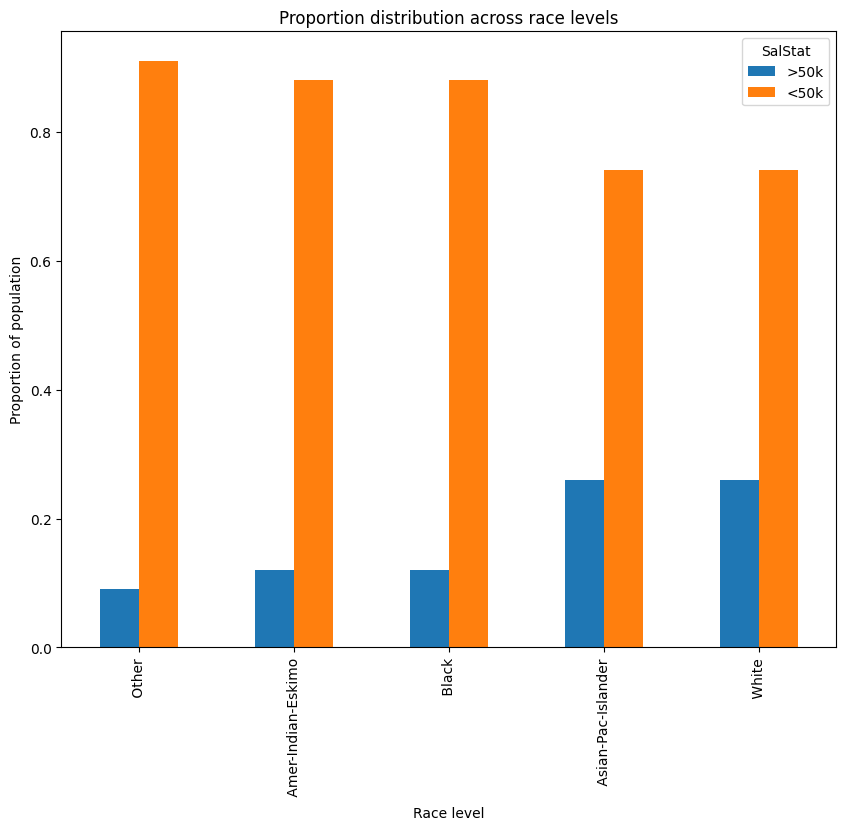

In [81]:
race = round(pd.crosstab(income_dataset.race, income_dataset.SalStat).div(pd.crosstab(income_dataset.race, income_dataset.SalStat).apply(sum,1),0),2)
race.sort_values(by = '>50k', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

print()

## Hours per week vs SalStat

we plot a bar graph showing the proportion of income classes across the hours worked.


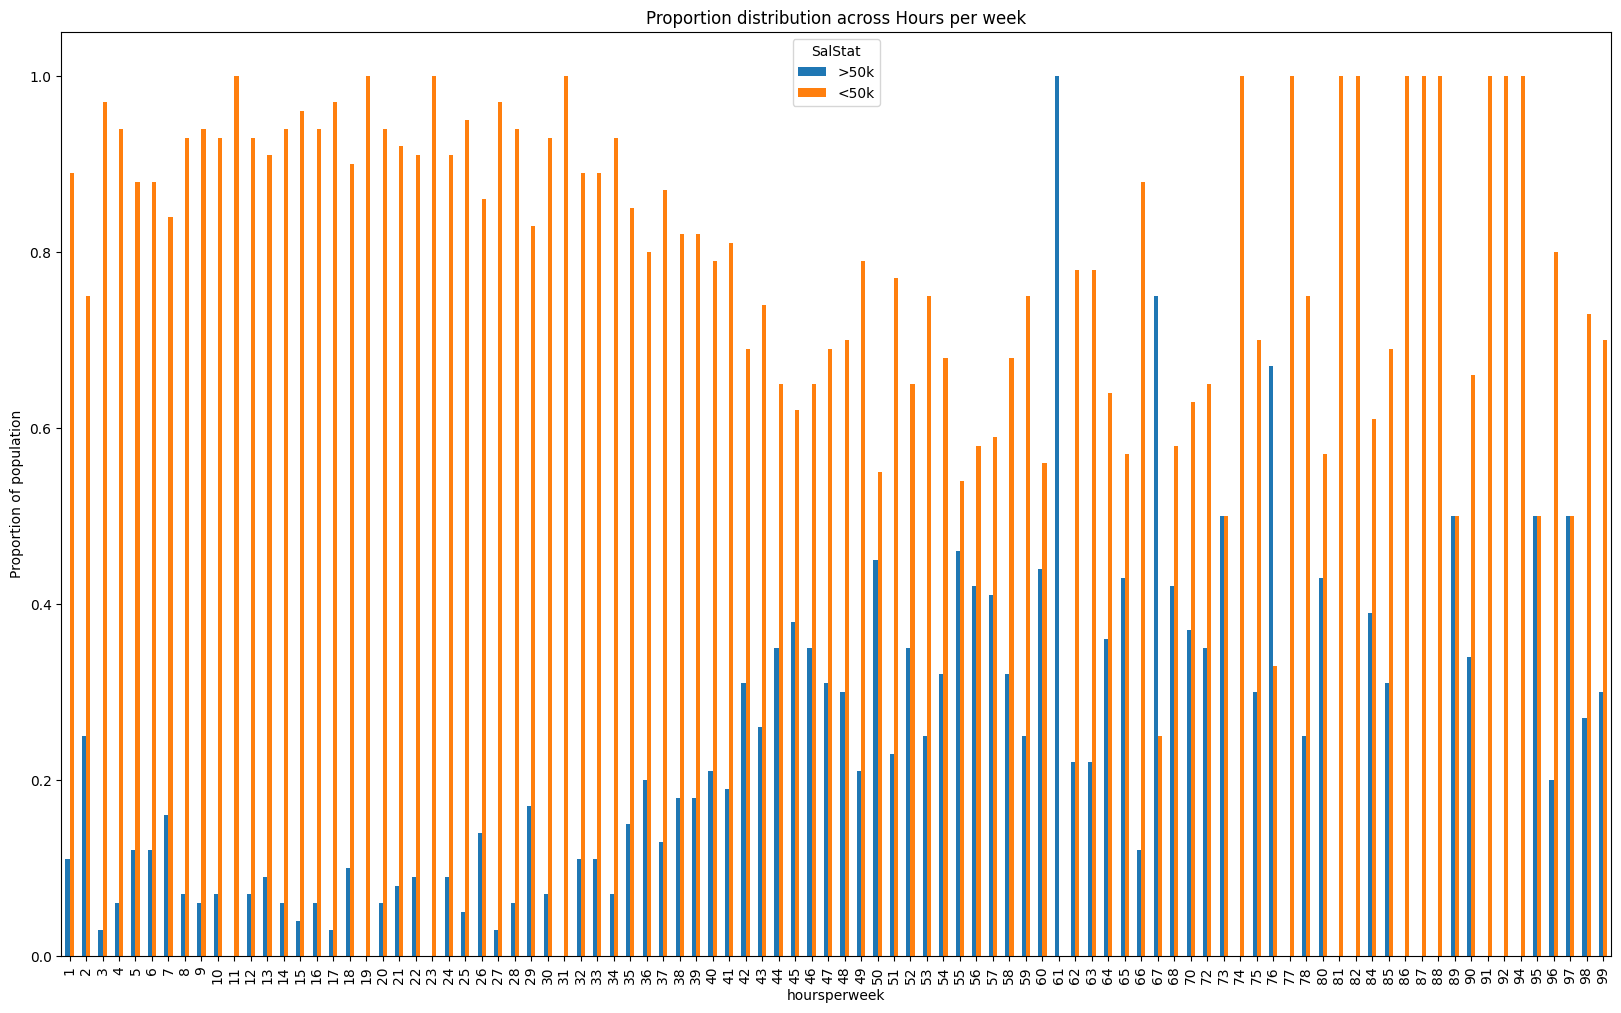

In [83]:
hoursperweek = round(pd.crosstab(income_dataset['hoursperweek'], income_dataset.SalStat).div(pd.crosstab(income_dataset['hoursperweek'], income_dataset.SalStat).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hoursperweek.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('hoursperweek')
ax.set_ylabel('Proportion of population')

print('we plot a bar graph showing the proportion of income classes across the hours worked.')

## Hours per week with categories

In [84]:
income_dataset['hoursperweek'] = ['<40' if i < '40' else '40-60' if i <= '60' else '>60'  for i in income_dataset['hoursperweek']]
income_dataset['hoursperweek'] = income_dataset['hoursperweek'].astype('category')
hoursperweek = round(pd.crosstab(income_dataset.hoursperweek, income_dataset.SalStat).div(pd.crosstab(income_dataset.hoursperweek, income_dataset.SalStat).apply(sum,1),0),2)

hoursperweek.sort_values(by = '>50k', inplace = True)
ax = hoursperweek.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')


TypeError: '<' not supported between instances of 'int' and 'str'

## Hours per week VS JobType

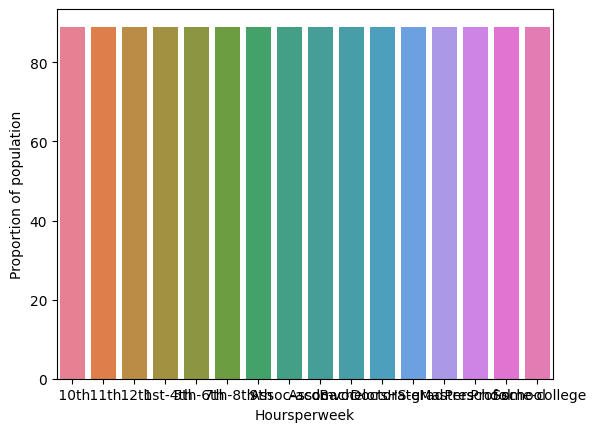

In [87]:
for i in income_dataset.JobType.unique():
    df = income_dataset[income_dataset.JobType == i]

    hoursperweek = round(pd.crosstab(df['hoursperweek'], df.EdType).div(pd.crosstab(df['hoursperweek'], df.EdType).apply(sum,1),0),2)
    # hoursperweek.sort_values(by = '>50K', inplace = True)
    ax = sns.countplot(hoursperweek)
     # ax = sns.countplot(hoursperweek, title = 'Proportion distribution across Hours per week for ', figsize = (20,12))
    ax.set_xlabel('Hoursperweek')
    ax.set_ylabel('Proportion of population')

    print()

## NORMALIZATION

Box plot


<Axes: >

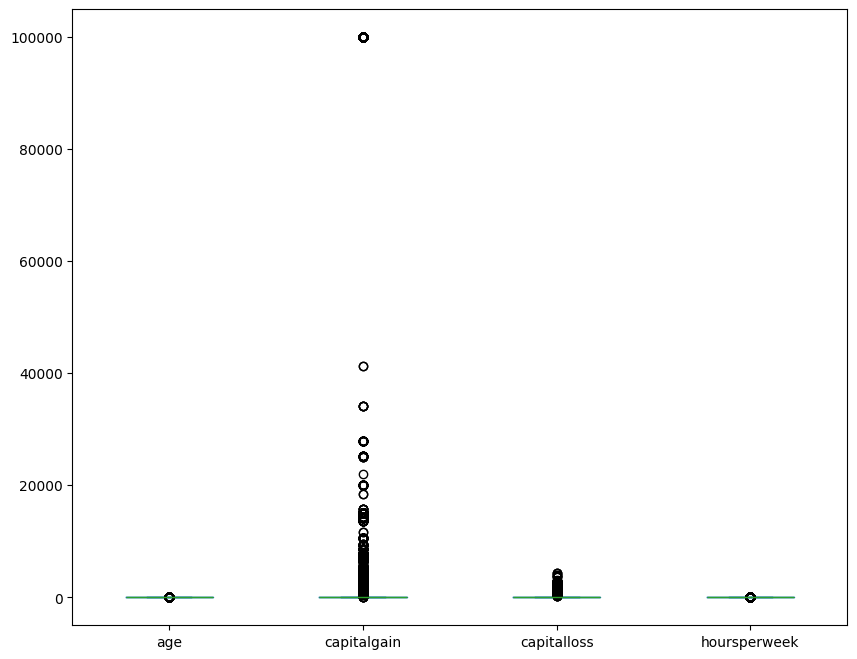

In [88]:
print('Box plot')
income_dataset.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

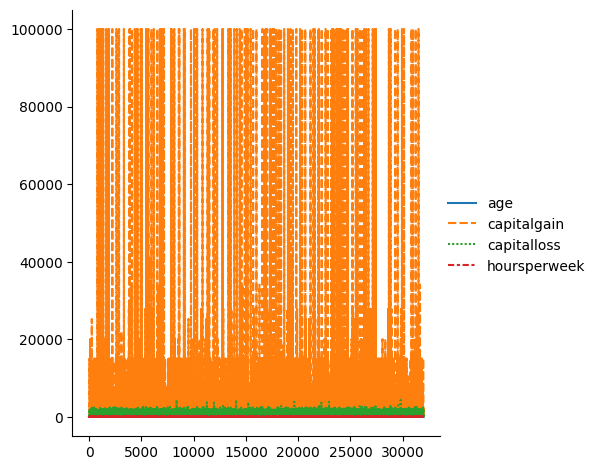

In [112]:
sns.relplot(income_dataset, kind='line')

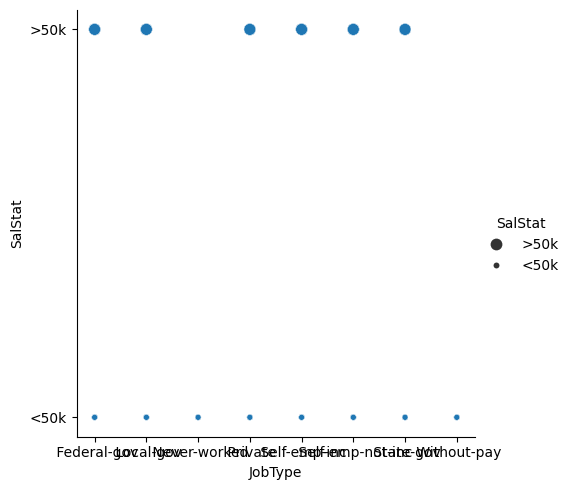

In [113]:
sns.relplot(data=income_dataset, kind='scatter',x='JobType', y='SalStat',size='SalStat' )

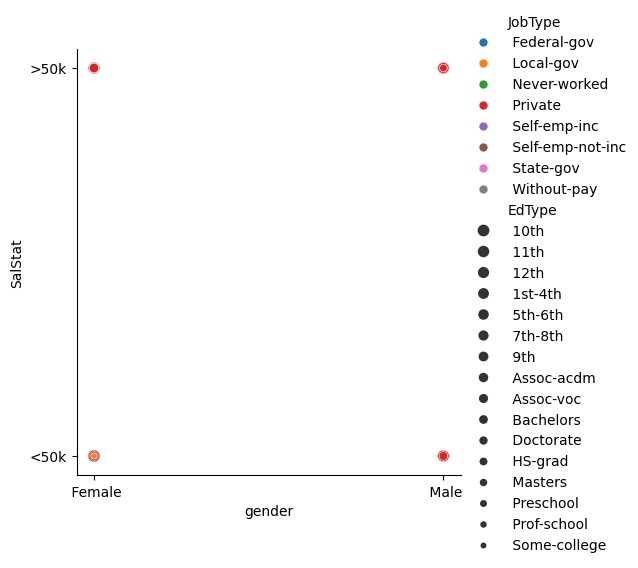

In [114]:
sns.relplot(data=income_dataset, kind='scatter',x='gender', y='SalStat',size='EdType', hue="JobType")